In [54]:
# Imports
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from __future__ import division
from __future__ import print_function

In [55]:
# Training Data
encoder = OneHotEncoder(sparse=False)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train_norm = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
x_test_norm = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))

y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc = encoder.fit_transform(y_test.reshape(-1,1))

seen = set()
sample_size = int(0.2* len(x_train_norm))
indexes = [i for i in range(len(x_train_norm))]

random_indexes = random.sample(indexes, sample_size)
print("Is Unique Indexes: ", len(random_indexes) == len(set(random_indexes)))

x_train_norm_temp = []
y_train_enc_temp = []

for i in random_indexes:
    x_train_norm_temp.append(x_train_norm[i])
    y_train_enc_temp.append(y_train_enc[i])

x_train_norm = np.array(x_train_norm_temp)
y_train_enc = np.array(y_train_enc_temp)

Is Unique Indexes:  True


Final test set loss: 1.755020
Final test set accuracy: 0.372300


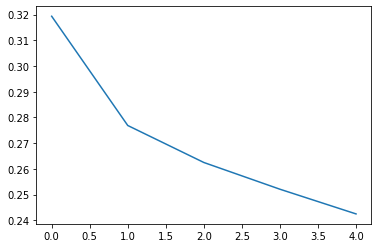

In [56]:
# MLP
mlp = keras.models.Sequential()

mlp.add(Flatten(input_shape=(32, 32, 3)))
mlp.add(Dense(512, activation="sigmoid"))
mlp.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
h = mlp.fit(x_train_norm, y_train_enc, verbose=0, batch_size=32, epochs=5)
plt.plot(np.log10(h.history['loss']))

results = mlp.evaluate(x_test_norm, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)


Final test set loss: 1.509920
Final test set accuracy: 0.531800


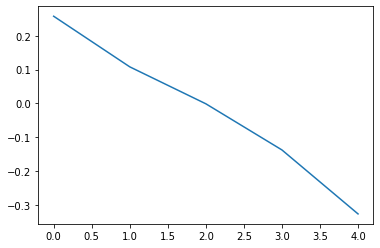

In [57]:
# CNN 1
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(10, activation='softmax', name='output'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


h = cnn.fit(x_train_norm, y_train_enc, verbose=0, batch_size=32, epochs=5)
plt.plot(np.log10(h.history['loss']))

results = cnn.evaluate(x_test_norm, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 1.190227
Final test set accuracy: 0.579700


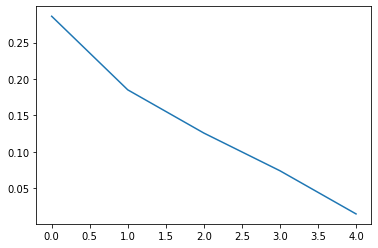

In [58]:
# CNN 2
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPool2D())
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dropout(0.2))
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation='softmax', name='output'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


h = cnn.fit(x_train_norm, y_train_enc, verbose=0, batch_size=32, epochs=5)
plt.plot(np.log10(h.history['loss']))

results = cnn.evaluate(x_test_norm, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))